In [1]:
#import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)   

2.8.2


In [3]:
#load in data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)

x_train.shape:  (60000, 28, 28)
x_test.shape:  (10000, 28, 28)


In [4]:
#build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28, 28)),
                                    tf.keras.layers.Dense(128, activation = "relu"),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation = "softmax")
])

In [7]:
#compile the model
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [8]:
#train the model/fit the data
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2886 - accuracy: 0.9160 - val_loss: 0.1373 - val_accuracy: 0.9594
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1364 - accuracy: 0.9599 - val_loss: 0.0937 - val_accuracy: 0.9718
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1022 - accuracy: 0.9690 - val_loss: 0.0926 - val_accuracy: 0.9724
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0839 - accuracy: 0.9741 - val_loss: 0.0767 - val_accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0719 - accuracy: 0.9771 - val_loss: 0.0745 - val_accuracy: 0.9780
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0637 - accuracy: 0.9798 - val_loss: 0.0712 - val_accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0566 - accuracy: 0.9815 - val_loss: 0.0686 - val_accuracy:

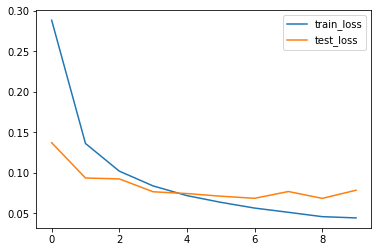

In [9]:
#plotting loss per iteration
plt.plot(r.history['loss'], label = 'train_loss')
plt.plot(r.history['val_loss'], label = 'test_loss')
plt.legend()
plt.show()

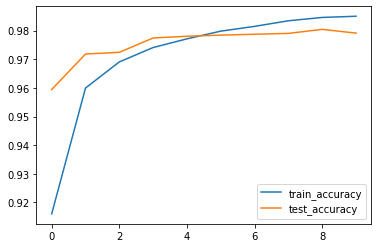

In [10]:
#plotting accuracy per iteration
plt.plot(r.history['accuracy'], label = 'train_accuracy')
plt.plot(r.history['val_accuracy'], label = 'test_accuracy')
plt.legend()
plt.show()

In [12]:
#evaluating the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 2ms/step - loss: 0.0786 - accuracy: 0.9791
[0.0785754919052124, 0.9790999889373779]
